### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70301: Mercedes<br>
    3530203_70302: Ford <br>
    3530903_70101: BMW <br>
    3530903_70102: Audi <br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Применить доступные способы предобработки данных.
4. Попытаться обучить регрессию для предсказания цены автомобиля c наилучшим качеством. Качество оценивать по метрике RMSE на тестовой подвыборке. Попробовать различные модели регуляризации (и не только).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
auto_data = pd.read_csv("merc.csv")
auto_data

model  year  price transmission  mileage fuelType  tax   mpg  \
0             SLK  2005   5200    Automatic    63000   Petrol  325  32.1   
1         S Class  2017  34948    Automatic    27000   Hybrid   20  61.4   
2        SL CLASS  2016  49948    Automatic     6200   Petrol  555  28.0   
3         G Class  2016  61948    Automatic    16000   Petrol  325  30.4   
4         G Class  2016  73948    Automatic     4000   Petrol  325  30.1   
...           ...   ...    ...          ...      ...      ...  ...   ...   
13114     C Class  2020  35999    Automatic      500   Diesel  145  55.4   
13115     B Class  2020  24699    Automatic     2500   Diesel  145  55.4   
13116   GLC Class  2019  30999    Automatic    11612   Diesel  145  41.5   
13117   CLS Class  2019  37990    Automatic     2426   Diesel  145  45.6   
13118     S Class  2019  54999    Automatic     2075   Diesel  145  52.3   

       engineSize  
0             1.8  
1             2.1  
2             5.5  
3             4.0  
4             4.0  
...           ...  
13114         2.0  
13115         2.0  
13116         2.1  
13117         2.0  
13118         2.9  

[13119 rows x 9 columns]

In [3]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


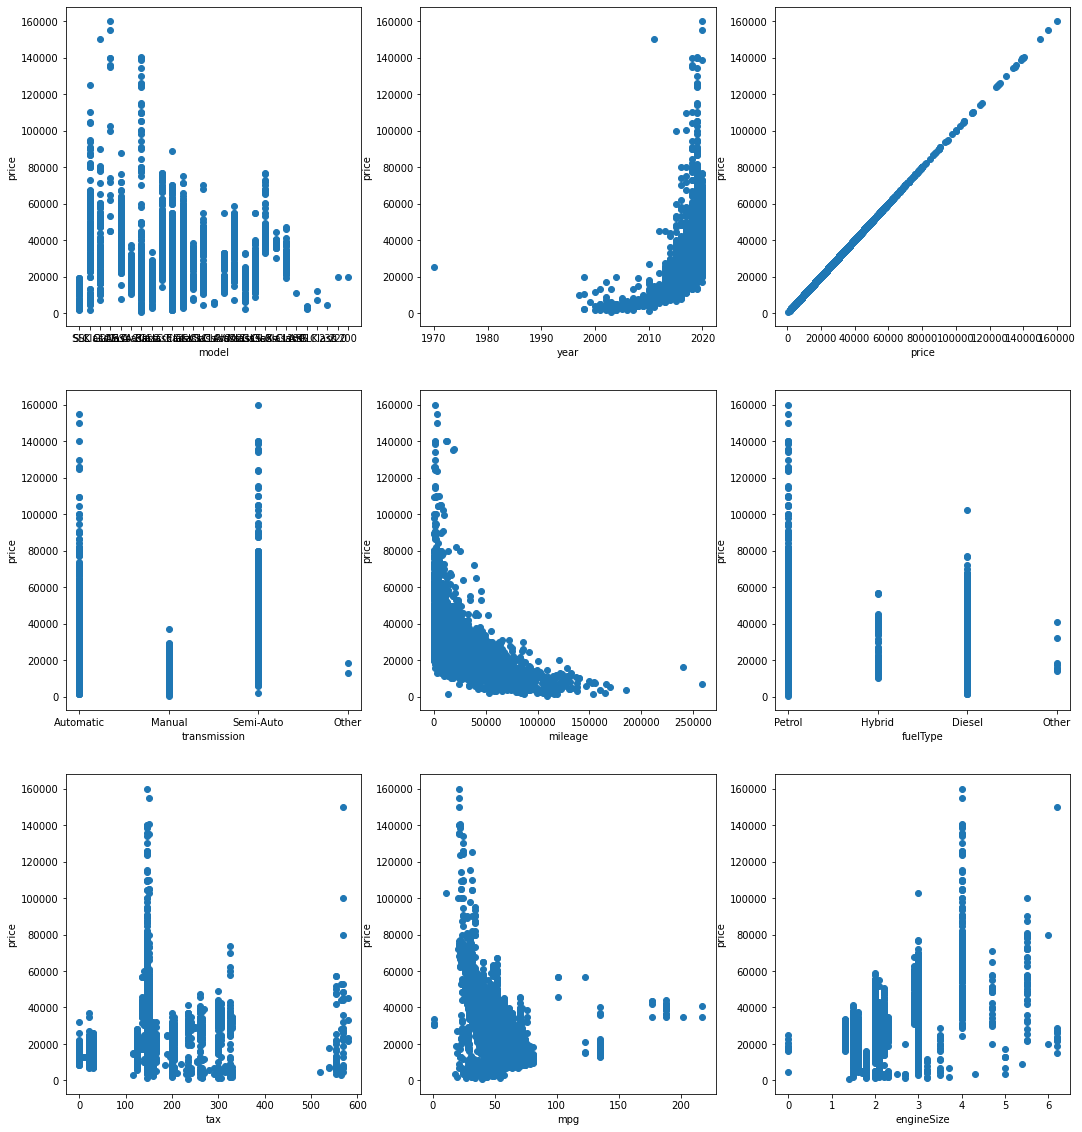

In [4]:
plt.figure(figsize=(18,20))
for i, column in enumerate(auto_data.columns):
    plt.subplot(3, 3, i + 1)
    plt.scatter(auto_data[column], auto_data['price'])
    plt.xlabel(column)
    plt.ylabel('price')

In [5]:
model_list = auto_data['model'].unique()
model_dic = {}
for i in range(len(model_list)):
    model_dic[model_list[i]] = i
    
trans_list = auto_data['transmission'].unique()
trans_dic = {}
for i in range(len(trans_list)):
    trans_dic[trans_list[i]] = i
    
fuel_list = auto_data['fuelType'].unique()
fuel_dic = {}
for i in range(len(fuel_list)):
    fuel_dic[fuel_list[i]] = i
    
auto_data.model = [model_dic[item] for item in auto_data.model]
auto_data.transmission = [trans_dic[item] for item in auto_data.transmission]
auto_data.fuelType = [fuel_dic[item] for item in auto_data.fuelType]

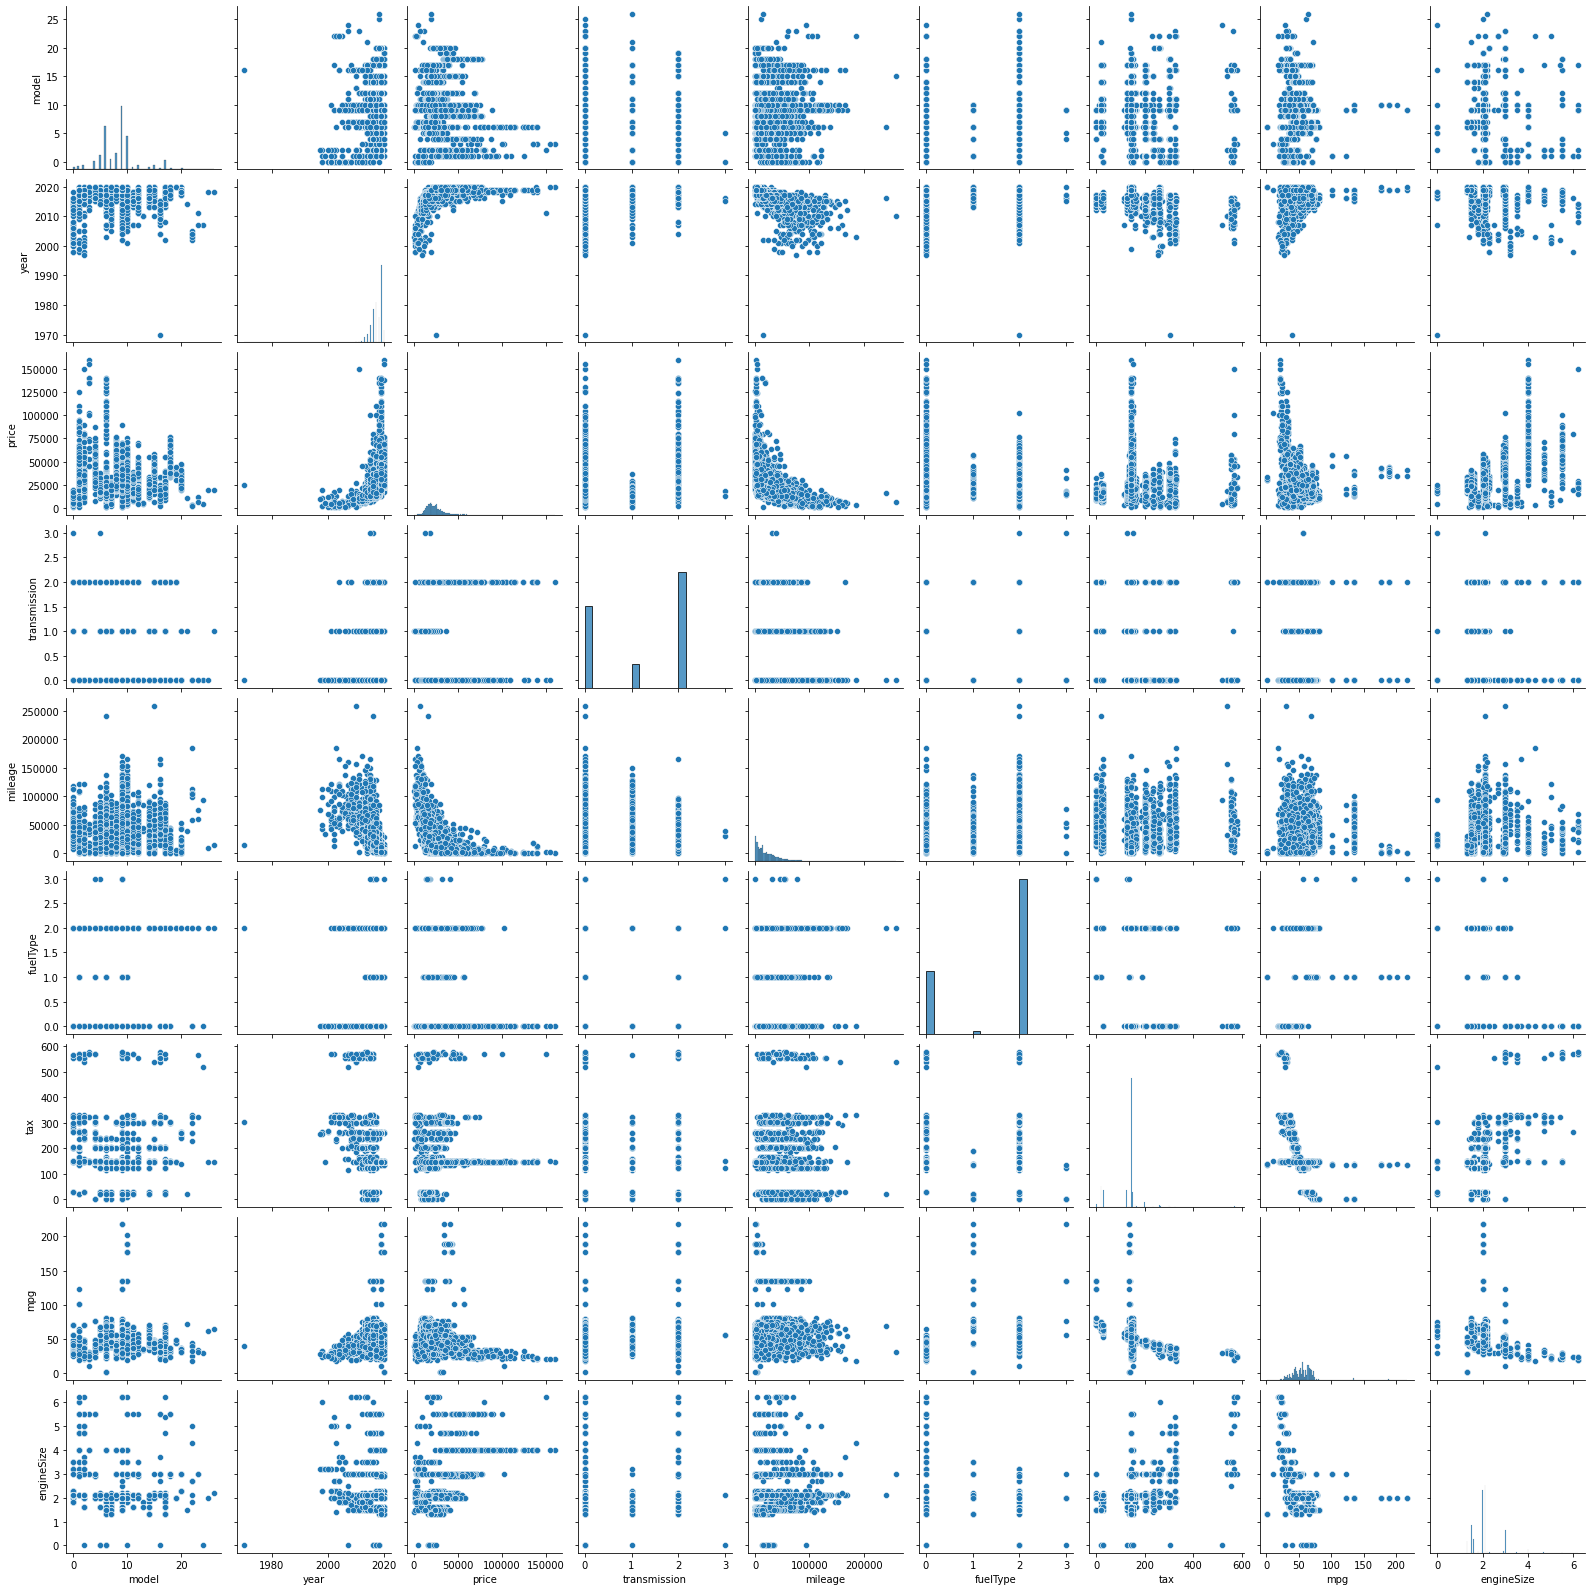

In [6]:
sns.pairplot(auto_data)

<AxesSubplot:>

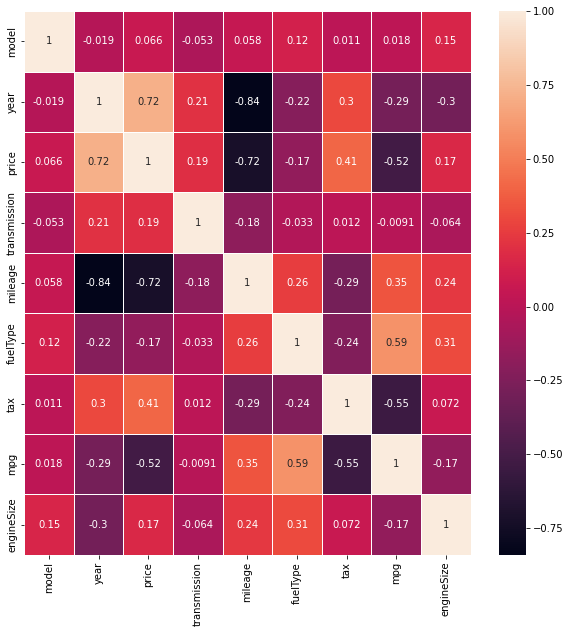

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(auto_data.corr(method='spearman'), annot = True, linewidths=0.7, ax=ax)

In [8]:
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.compose import TransformedTargetRegressor

from sklearn.model_selection import train_test_split

In [9]:
X, Y = auto_data.drop(['price'], axis=1), auto_data['price']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train

model  year  transmission  mileage  fuelType  tax   mpg  engineSize
5967       5  2018             2     6361         2  145  56.5         2.1
3913       9  2018             0     8400         2  145  57.7         2.0
1638       9  2016             2    35991         2   30  64.2         2.1
4714       4  2019             0     5501         2  145  36.7         2.0
5217       8  2020             2      859         0  145  32.1         2.0
...      ...   ...           ...      ...       ...  ...   ...         ...
11633      8  2019             0    21118         0  150  37.2         2.0
1344       6  2016             2    22433         2   20  74.3         1.5
12815      8  2019             0    11190         2  150  56.5         2.1
7293       6  2019             2     5738         0  145  53.3         1.3
1289       9  2018             2    23061         2  145  67.3         2.1

[9183 rows x 8 columns]

In [11]:
scaler = RobustScaler(quantile_range=(25, 75))
transformer = PowerTransformer(method="yeo-johnson")

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.33333333],
       [ 0.        ,  0.        , -1.        , ...,  0.        ,
         0.06451613,  0.        ],
       [ 0.        , -0.66666667,  0.        , ..., -5.75      ,
         0.41397849,  0.33333333],
       ...,
       [-0.25      ,  0.33333333, -1.        , ...,  0.25      ,
         0.        ,  0.33333333],
       [-0.75      ,  0.33333333,  0.        , ...,  0.        ,
        -0.17204301, -2.33333333],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.58064516,  0.33333333]])

In [12]:
def dummy_LR (X_train, X_test, Y_train, Y_test):
    
    Y_mean = Y_train.mean()
    
    return np.full(Y_test.shape, Y_mean)

dummy_LR_predictions = dummy_LR (X_train, X_test, Y_train, Y_test)

dummy_LR_RMSE = metrics.mean_squared_error(Y_test, dummy_LR_predictions, squared=False)

print (f'Dummy RMSE = {round(dummy_LR_RMSE, 3)}')

Dummy RMSE = 12331.392


In [13]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)

simple_LR_predictions = simple_LR.predict(X_test_scaled)

simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared=False)

print (f'Simple LR RMSE = {round(simple_LR_RMSE,3)}')

Simple LR RMSE = 6835.064


In [23]:
lasso = Lasso()

lasso.fit(X_train_scaled, Y_train)

lasso_pred = lasso.predict(X_test_scaled)

lasso_rmse = metrics.mean_squared_error(Y_test, lasso_pred, squared=False)

print (f'Lasso LR RMSE = {round(lasso_rmse,3)}')

Lasso LR RMSE = 6835.369


In [24]:
pd.DataFrame(lasso.coef_, auto_data.columns[1:], columns=['Coefficients'])

Coefficients
year           -389.468759
price          6065.154492
transmission    -14.341533
mileage       -3615.329550
fuelType       -641.496636
tax            -215.083679
mpg           -2708.912516
engineSize     3291.378301

Text(0, 0.5, 'Target')

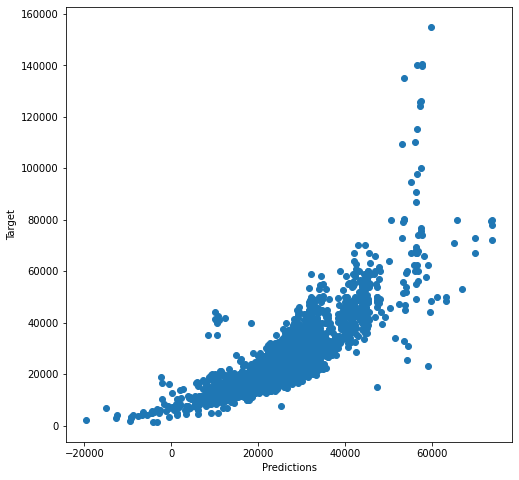

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [26]:
model = TransformedTargetRegressor(regressor=Ridge(),
                                   transformer=transformer)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'Lasso RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

Lasso RMSE = 6293.229


Text(0, 0.5, 'Target')

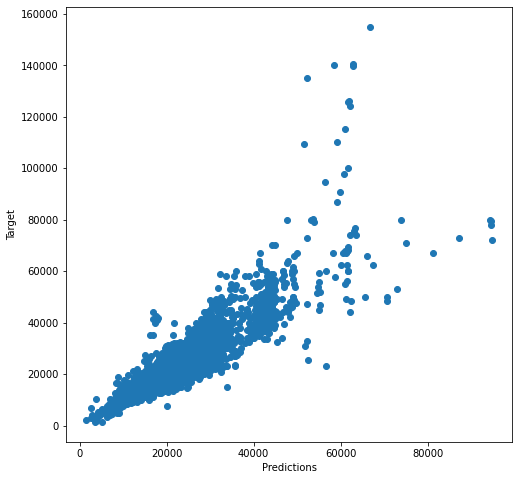

In [21]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')